# Article counts by month

Main tasks:
- article counts per media set and outlet
- plotting counts by month
- calculating correlation between two media sets

In [1]:
import pandas as pd #
import requests
import time
from tqdm import tqdm
import json
import os
from urllib.parse import urlparse
import matplotlib as plt
import matplotlib.pyplot as plt
import nltk

In [2]:
df = pd.read_csv('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/Data/Mediacloud-NexisUni-corpus2.csv', encoding='latin-1')
df.head()

,ï»¿date,maintext,title,source,media_name,ideology,Congress
0,03/01/2013,"GREG GUTFELD, CO-HOST: Hello, America. I'm G...",Reagan Era Over?; Al Jazeera Buys Current TV,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th
1,11/01/2013,With the latest threat to his leadership eas...,"His Job Safe, Straus's Next Challenge Is the G...",C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th
2,18/01/2013,Story highlights Nicolaus Mills remembers MLK'...,"48 years after MLK march, voting rights still ...",https://edition.cnn.com/2013/01/18/opinion/mil...,CNN,left,113th
3,20/01/2013,Barack and Michelle Obama have spent more th...,"Change Comes: After 4 Years, Friends See Shift...",C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th
4,21/01/2013,"SEAN HANNITY, HOST: And welcome to HANNITY, ...",Interview with Karl Rove,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th


In [4]:
df.rename(columns={'ï»¿date': 'date'}, inplace=True)
# Find and remove duplicates
df['exclude_dupe'] = df.duplicated(subset=['title', 'date'])

### Converting publish_date to datetime

In [5]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce') # converting publish_date to datetime
df.head()

C:\Users\2146806A\AppData\Local\Temp\ipykernel_23492\2893053947.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'], errors = 'coerce') # converting publish_date to datetime


,date,maintext,title,source,media_name,ideology,Congress,exclude_dupe
0,2013-03-01,"GREG GUTFELD, CO-HOST: Hello, America. I'm G...",Reagan Era Over?; Al Jazeera Buys Current TV,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th,False
1,2013-11-01,With the latest threat to his leadership eas...,"His Job Safe, Straus's Next Challenge Is the G...",C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th,False
2,2013-01-18,Story highlights Nicolaus Mills remembers MLK'...,"48 years after MLK march, voting rights still ...",https://edition.cnn.com/2013/01/18/opinion/mil...,CNN,left,113th,False
3,2013-01-20,Barack and Michelle Obama have spent more th...,"Change Comes: After 4 Years, Friends See Shift...",C:/Users/2146806A/OneDrive - University of Gla...,The New York Times,left,113th,False
4,2013-01-21,"SEAN HANNITY, HOST: And welcome to HANNITY, ...",Interview with Karl Rove,C:/Users/2146806A/OneDrive - University of Gla...,Fox News,right,113th,False


In [6]:
# Find and exlude articles without date, check how many stories are left
df['date'].isnull().sum()
df = df.loc[(~df['date'].isna())]
len(df)

4272

In [7]:
# Remove articles that fall outside timeframe
df = df[df['Congress'] != 'other']
len(df)

4255

### counting articles per Congress / media ideology

In [8]:
domain = df['Congress'].value_counts()
pd.DataFrame(domain)

,Congress
117th,1557
116th,784
115th,706
113th,640
114th,568


In [9]:
# articles per media
media = df['media_name'].value_counts()
pd.DataFrame(media)

,media_name
The New York Times,1109
Washington Times,562
Huffington Post,476
Washington Post,475
Fox News,424
Breitbart,388
CNN,345
Daily Caller,222
USA Today,142
NY Post,112


In [10]:
# articles per media ideology
ideology = df['ideology'].value_counts()
pd.DataFrame(ideology)

,ideology
left,2547
right,1708


<Axes: title={'center': 'Articles per Congress'}, xlabel='Congress'>

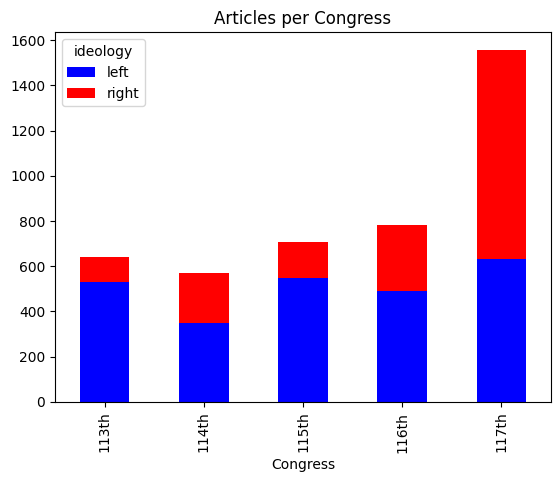

In [11]:
# Plotting articles per media outlet ideology and Congress
df.groupby(['Congress', 'ideology']).size().unstack().plot(kind='bar', color=('blue', 'red'), title="Articles per Congress", fontsize=10, stacked=True)

<Axes: title={'center': 'Articles per News Media Ideology'}, xlabel='ideology'>

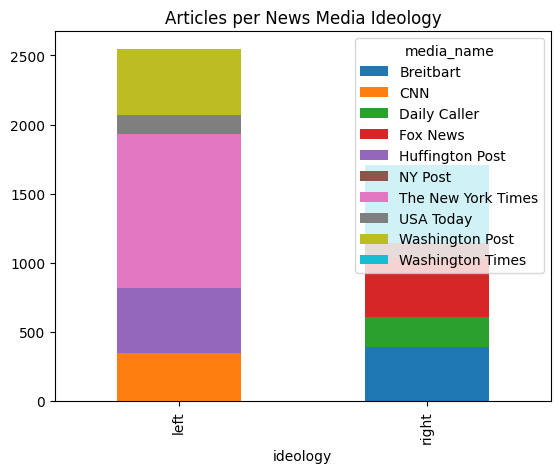

In [12]:
# Plotting media outlet stories by ideology
df.groupby(['ideology', 'media_name']).size().unstack().plot(kind='bar', title="Articles per News Media Ideology", fontsize=10, stacked=True)

### Plotting by time

In [14]:
df_dates = df.groupby('media_name').agg({'date': ['min', 'max']}).reset_index()
df_dates.columns = df_dates.columns.to_flat_index()
df_dates = df_dates.rename(columns={df_dates.columns[0]: "media_name",
                                      df_dates.columns[1]: "min_retrieved_date",
                                      df_dates.columns[2]: "max_retrieved_date"})

df_dates

,media_name,min_retrieved_date,max_retrieved_date
0,Breitbart,2013-07-25,2022-11-25
1,CNN,2013-01-18,2022-12-18
2,Daily Caller,2013-06-25,2022-11-17
3,Fox News,2013-01-10,2022-12-26
4,Huffington Post,2013-01-04,2022-10-02
5,NY Post,2013-01-09,2022-11-23
6,The New York Times,2013-01-03,2022-12-14
7,USA Today,2013-01-10,2022-12-01
8,Washington Post,2013-03-12,2022-12-16
9,Washington Times,2013-04-09,2022-12-17


In [15]:
# plotting by month
by_month = pd.to_datetime(df['date']).dt.to_period('M').value_counts().sort_index()
by_month.index = pd.PeriodIndex(by_month.index)
df_month = by_month.rename_axis('month').reset_index(name='counts')
df_month.to_csv('monthcount.csv', index = False)


In [16]:
by_month_ideology = df.groupby(['ideology', pd.to_datetime(df['date']).dt.to_period('M')])['date'].count().unstack(level=0).fillna(0)
by_month_ideology


ideology,left,right
date,,
2013-01,12.0,6.0
2013-02,18.0,0.0
2013-03,17.0,2.0
2013-04,13.0,2.0
2013-05,12.0,2.0
...,...,...
2022-08,19.0,16.0
2022-09,15.0,14.0
2022-10,12.0,30.0


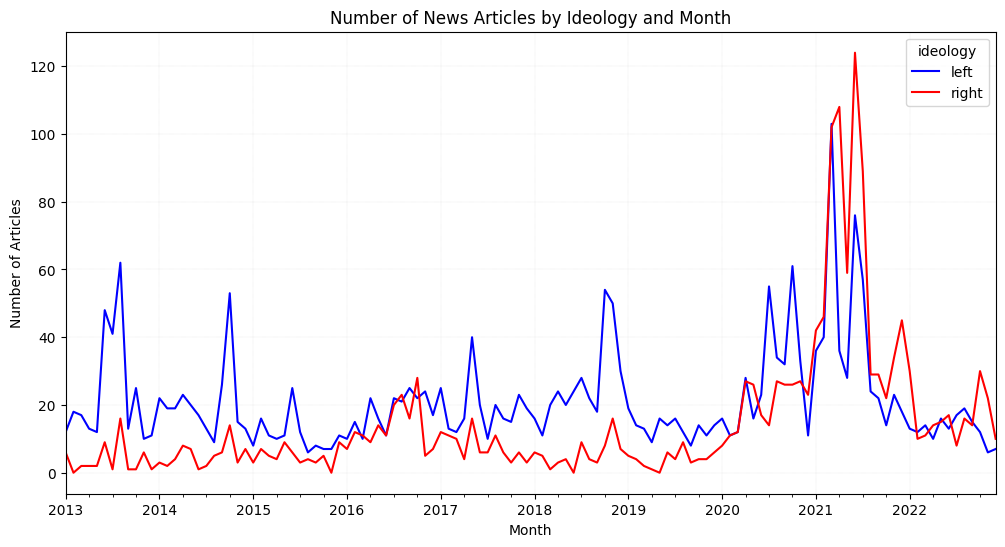

In [17]:
import matplotlib.pyplot as plt

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data with custom colors
by_month_ideology.plot(ax=ax, color=['blue', 'red'])

# Set the title and axis labels
ax.set_title("Number of News Articles by Ideology and Month")
ax.set_xlabel("Month")
ax.set_ylabel("Number of Articles")

# Add grid and set background color
ax.grid(color='gray', linestyle=':', linewidth=0.25, alpha=0.5)
#ax.set_facecolor('#f2f2f2')

# Show the plot
#plt.show()

# save the plot to a specific file path
# plt.savefig('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/March_analysis/plots/articles-over-time-per-ideology.jpg', dpi=300)


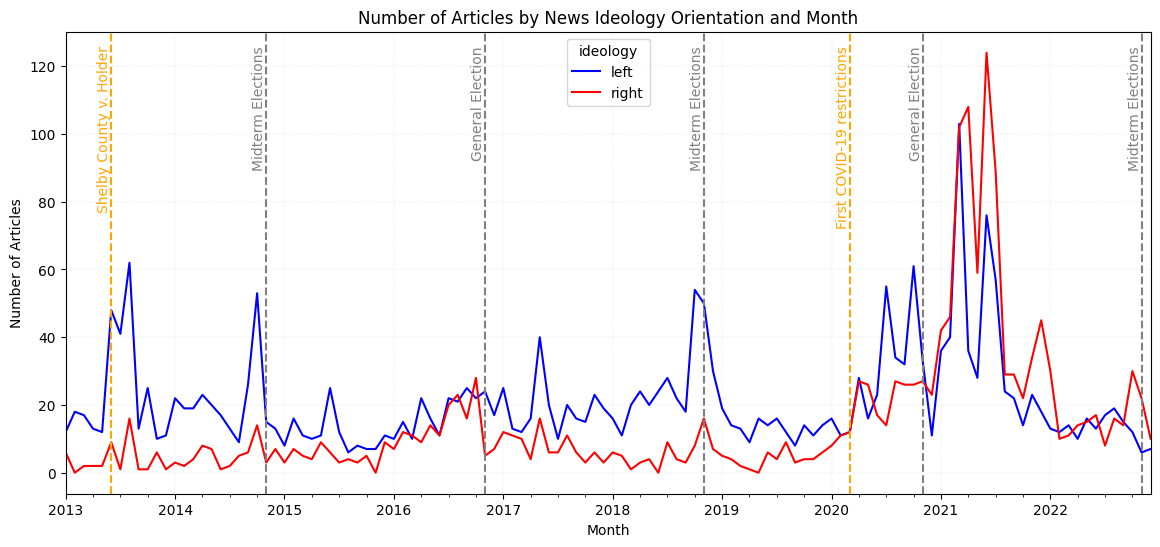

In [18]:
import matplotlib.pyplot as plt

# Create figure and plot space
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the data with custom colors
by_month_ideology.plot(ax=ax, color=['blue', 'red'])

# Set the title and axis labels
ax.set_title("Number of Articles by News Ideology Orientation and Month")
ax.set_xlabel("Month")
ax.set_ylabel("Number of Articles")

# Add grid and set background color
ax.grid(color='gray', linestyle=':', linewidth=0.25, alpha=0.5)

# Add vertical lines and event titles
event_dates = ['2013-06-25', '2014-11-04','2016-11-08','2018-11-06', '2020-03-12','2020-11-03', '2022-11-08']  # Example event dates
event_titles = ['Shelby County v. Holder', 'Midterm Elections','General Election','Midterm Elections', 'First COVID-19 restrictions','General Election',  'Midterm Elections']  # Example event titles
event_colors = ['orange', 'grey','grey', 'grey', 'orange', 'grey', 'grey']  # Example line colors

for date, title, color in zip(event_dates, event_titles, event_colors):
    ax.axvline(x=date, color=color, linestyle='--')
    ax.annotate(title, xy=(date, ax.get_ylim()[1]), xytext=(-5, -10), textcoords='offset points', color=color, rotation=90,
                 ha='center', va='top', fontsize=10)
# Show the plot
#plt.show()

# save the plot to a specific file path
plt.savefig('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/articles-over-time.jpg', dpi=300)

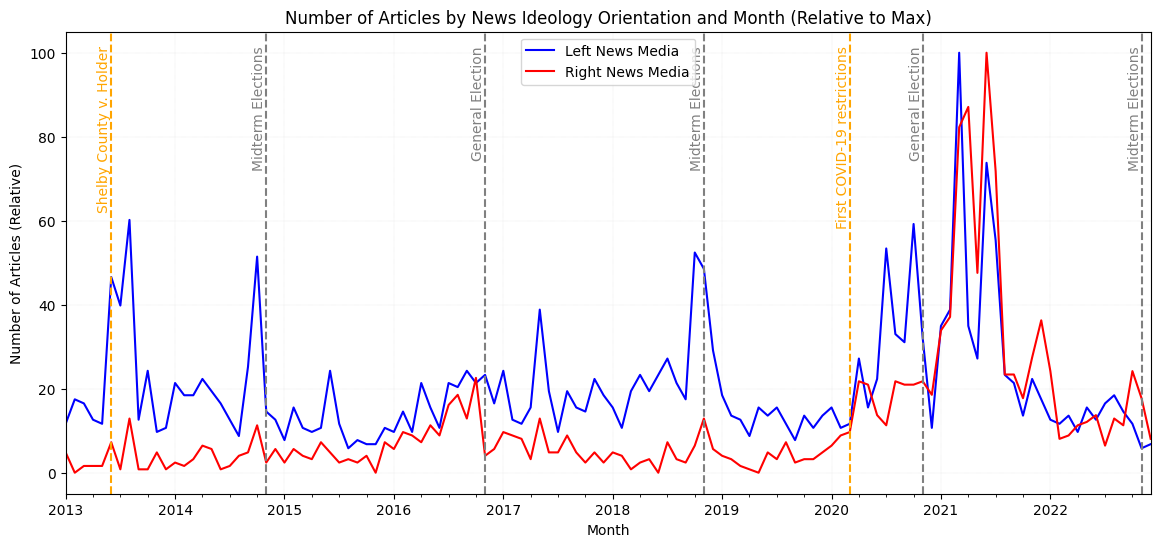

In [19]:
# NORMALISED GRAPH
fig, ax = plt.subplots(figsize=(14, 6))
# Find the media on the left and right with the highest score
left_max = by_month_ideology['left'].max()
right_max = by_month_ideology['right'].max()

# Calculate relative values
left_relative_values = by_month_ideology['left'] / left_max * 100
right_relative_values = by_month_ideology['right'] / right_max * 100

# Plot
left_relative_values.plot(ax=ax, color='blue', label='Left News Media')
right_relative_values.plot(ax=ax, color='red', label='Right News Media')

# title and axis labels
ax.set_title("Number of Articles by News Ideology Orientation and Month (Relative to Max)")
ax.set_xlabel("Month")
ax.set_ylabel("Number of Articles (Relative)")

# grid and set background color
ax.grid(color='gray', linestyle=':', linewidth=0.25, alpha=0.5)

# vertical lines and event titles
event_dates = ['2013-06-25', '2014-11-04','2016-11-08','2018-11-06', '2020-03-12','2020-11-03', '2022-11-08']  # Example event dates
event_titles = ['Shelby County v. Holder', 'Midterm Elections','General Election','Midterm Elections', 'First COVID-19 restrictions','General Election',  'Midterm Elections']  # Example event titles
event_colors = ['orange', 'grey','grey', 'grey', 'orange', 'grey', 'grey']  # Example line colors

for date, title, color in zip(event_dates, event_titles, event_colors):
    ax.axvline(x=date, color=color, linestyle='--')
    ax.annotate(title, xy=(date, ax.get_ylim()[1]), xytext=(-5, -10), textcoords='offset points', color=color, rotation=90,
                 ha='center', va='top', fontsize=10)

ax.legend()

# save the plot to a specific file path
plt.savefig('C:/Users/2146806A/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/GITHUB FILES/articles-over-time_normalised.jpg', dpi=300)

In [22]:
# calculate spearmans rank correlation
# The value ranges from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

from scipy.stats import spearmanr
# Calculate Spearman's rank correlation coefficient and p-value
correlation, p_value = spearmanr(by_month_ideology['left'], by_month_ideology['right'])
# Print the correlation coefficient and p-value
print("Spearman's Rank Correlation Coefficient:", correlation)
print("P-value:", p_value)

Spearman's Rank Correlation Coefficient: 0.3594815935386606
P-value: 5.52206875859226e-05
